In [102]:
pred_dynamic = uptown_output.get_prediction(start=pd.to_datetime('2016-04-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

In [103]:
uptown_train_forecasted = pred_dynamic.predicted_mean
uptown_train_truth = uptown_train['2016-04-01':]

rms = mean_squared_error(uptown_train_truth, uptown_train_forecasted, squared=False)
round(rms, 2)

2106.08

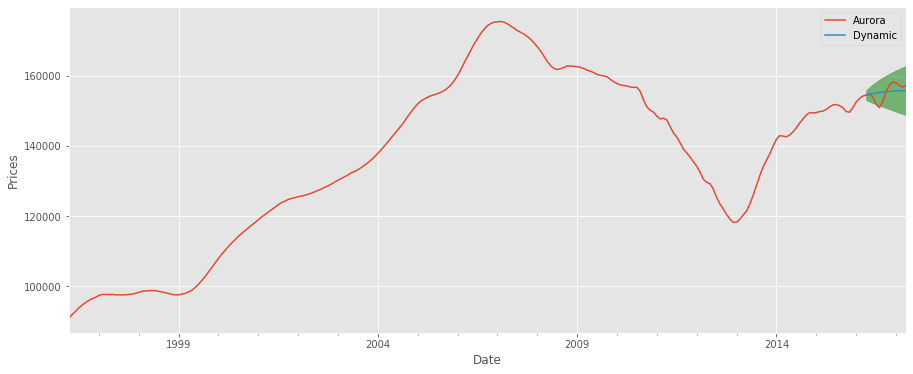

In [104]:
rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = uptown_train.plot(label='uptown')

# Plot predicted values
pred_dynamic.predicted_mean.plot(ax=ax, label='Dynamic')

# Plot the range for confidence intervals
ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Prices')
plt.legend()

plt.show()